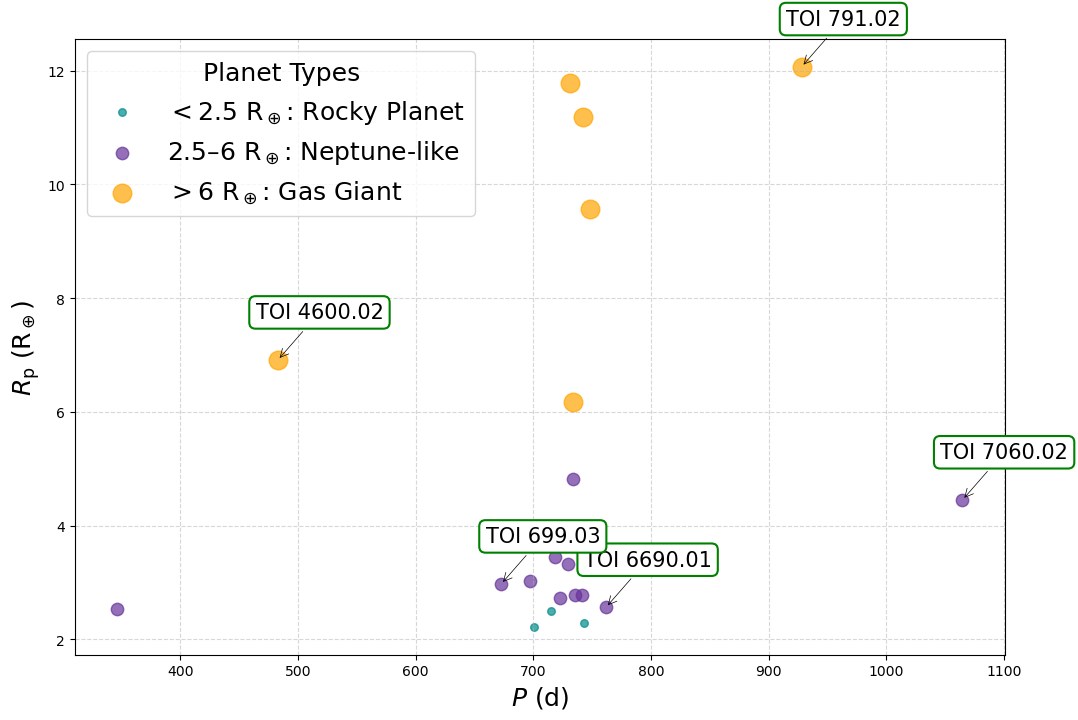

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Enable LaTeX rendering in Matplotlib
plt.rcParams['text.usetex'] = False

# Read the CSV file
file_path = "Raduis_OrbPer_HZ_Planet_chart.csv"
data = pd.read_csv(file_path)

# Extract the required columns
pl_orbper = data['pl_orbper']  # Planet orbital period (X-axis)
pl_rade = data['pl_rade']      # Planet radius (Y-axis)
multi_pl = data['multi_pl']    # Multi-planet system flag
toi = data['toi']              # Target of Interest (labels)

# Define dot sizes and colors based on pl_rade
dot_size_small = 30    # Size for small dots
dot_size_medium = 80   # Size for medium dots
dot_size_large = 180    # Size for large dots

# Create the scatter plot
plt.figure(figsize=(12, 8))

# Plot dots based on pl_rade values
# 1) pl_rade < 2.5: Small darkcyan dots (Rocky Planet)
plt.scatter(pl_orbper[pl_rade < 2.5], pl_rade[pl_rade < 2.5], 
            s=dot_size_small, color='darkcyan', label=r'$<2.5~\mathrm{R}_\oplus$: Rocky Planet', alpha=0.7)

# 2) 2.5 <= pl_rade <= 6: Medium rebeccapurple dots (Neptune-like)
plt.scatter(pl_orbper[(pl_rade >= 2.5) & (pl_rade <= 6)], pl_rade[(pl_rade >= 2.5) & (pl_rade <= 6)], 
            s=dot_size_medium, color='rebeccapurple', label=r'$2.5$–$6~\mathrm{R}_\oplus$: Neptune-like', alpha=0.7)

# 3) pl_rade > 6: Large orange dots (Gas Giant)
plt.scatter(pl_orbper[pl_rade > 6], pl_rade[pl_rade > 6], 
            s=dot_size_large, color='orange', label=r'$>6~\mathrm{R}_\oplus$: Gas Giant', alpha=0.7)

# Function to check if a label position overlaps with other dots
def is_overlapping(x, y, x_labels, y_labels, padding=5):
    for x_label, y_label in zip(x_labels, y_labels):
        if abs(x - x_label) < padding and abs(y - y_label) < padding:
            return True
    return False

# Store positions of labels to avoid overlap
label_positions = []

# Add call-out labels for multi-planet systems (multi_pl == 1) and pl_rade < 2.5
for i in range(len(data)):
    if multi_pl[i] == 1:  # Add labels for multi-planet systems and Rocky Planets
        x, y = pl_orbper[i], pl_rade[i]  # Coordinates of the point
        offset_x, offset_y = 30, 30  # Initial offset

        # Adjust the offset to avoid overlapping with other labels or dots
        while is_overlapping(x + offset_x, y + offset_y, pl_orbper, pl_rade, padding=10) or \
              is_overlapping(x + offset_x, y + offset_y, [pos[0] for pos in label_positions], [pos[1] for pos in label_positions], padding=10):
            offset_x += 5  # Increase horizontal offset
            offset_y += 5  # Increase vertical offset

        # Add the label
        plt.annotate(
            f"TOI {toi[i]}",  # Label text
            (x, y),  # Coordinates of the point
            textcoords="offset points",  # Offset from the point
            xytext=(offset_x, offset_y),  # Adjusted offset
            ha='center',  # Horizontal alignment
            fontsize=15,  # Font size
            arrowprops=dict(arrowstyle="->", color="black", lw=0.5),  # Arrow properties
            bbox=dict(boxstyle="round,pad=0.3", edgecolor="green", facecolor="white", lw=1.5)  # Green outline
        )

        # Store the label position to avoid future overlaps
        label_positions.append((x + offset_x, y + offset_y))

# Add labels with LaTeX formatting
plt.xlabel(r'$P$ (d)', fontsize=18)  # X-axis label
plt.ylabel(r'$R_\mathrm{p}$ ($\mathrm{R}_\oplus$)', fontsize=18)  # Y-axis label

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Add legend
plt.legend(title='Planet Types', title_fontsize=18, fontsize=18, loc='upper left')

# Save the plot as a PDF file
plt.savefig("HZ_Planet_Radius_OrPer.pdf", format="pdf", bbox_inches="tight")

# Show the plot (optional)
plt.show()